In [1]:
#supress warnings

import warnings
warnings.filterwarnings('ignore')

# 1. Importing Libraries

In [2]:
# importing important libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5) # permanent style
%matplotlib inline

# 2. Reading Data

In [3]:
# widening the display to see all columns
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# reading data and printing first 5 rows
df = pd.read_csv("Leads.csv")
df.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened


# 3. Cleaning Data

### Counting rows and columns

In [4]:
rows=len(df)
columns=len(df.columns)
original_shape = df.shape
print("No. of rows:",rows) # no. of rows  
print("No. of columns:",columns) # no. of columns 
print("No. of values:",df.size) # no. of cells in dataframe

No. of rows: 9240
No. of columns: 37
No. of values: 341880


### Missing values in each column

In [5]:
missing = pd.DataFrame(df.isnull().sum(), columns=['Actual count'])
missing['Percentage']=round(100*(df.isnull().sum(axis = 0)/len(df)),2)
missing

,Actual count,Percentage
Prospect ID,0,0.00
Lead Number,0,0.00
Lead Origin,0,0.00
Lead Source,36,0.39
Do Not Email,0,0.00
Do Not Call,0,0.00
Converted,0,0.00
TotalVisits,137,1.48
Total Time Spent on Website,0,0.00
Page Views Per Visit,137,1.48


### Checking duplicates

In [6]:
original_shape = df.shape
print("Data shape before:", original_shape)
df.drop_duplicates(inplace = True)       # dropping duplicate if any
print("Data shape after:",df.shape)

Data shape before: (9240, 37)
Data shape after: (9240, 37)


<div class="alert alert-block alert-info">
<b>Note:</b> No duplicate values.
</div>

## <span style="color: red;"> Value Counts </span>
### `Lead Origin`

In [7]:
print('Percentage of Null:',round(100*(df['Lead Origin'].isnull().sum(axis = 0)/len(df)),2))
round(df['Lead Origin'].value_counts(normalize=True),2)

Percentage of Null: 0.0


Landing Page Submission    0.53
API                        0.39
Lead Add Form              0.08
Lead Import                0.01
Quick Add Form             0.00
Name: Lead Origin, dtype: float64

<div class="alert alert-block alert-info">
<b>Note:</b> Column to be kept and values to be merged.
</div>

### `Lead Source`

In [8]:
print('Percentage of Null:',round(100*(df['Lead Source'].isnull().sum(axis = 0)/len(df)),2))
round(df['Lead Source'].value_counts(),2)

Percentage of Null: 0.39


Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
youtubechannel          1
WeLearn                 1
blog                    1
welearnblog_Home        1
NC_EDM                  1
testone                 1
Pay per Click Ads       1
Name: Lead Source, dtype: int64

<div class="alert alert-block alert-success">
<b>Note:</b> This column tells the source of information, so it will be merged with other similar columns:
    <ul>
        <li>'How did you hear about X Education'</li>
        <li>'Search'</li>
        <li>'Newspaper Article'</li>
        <li>'X Education Forums'</li>
        <li>'Newspaper'</li>
        <li>'Digital Advertisement'</li>
        <li>'Through Recommendations'</li>
    </ul>
</div>

### `Do Not Email`

In [9]:
print('Percentage of Null:',round(100*(df['Do Not Email'].isnull().sum(axis = 0)/len(df)),2))
round(df['Do Not Email'].value_counts(normalize=True),2)

Percentage of Null: 0.0


No     0.92
Yes    0.08
Name: Do Not Email, dtype: float64

<div class="alert alert-block alert-danger">
<b>Note:</b> Column to be removed.
</div>

### `Do Not Call`

In [10]:
print('Percentage of Null:',round(100*(df['Do Not Call'].isnull().sum(axis = 0)/len(df)),2))
round(df['Do Not Call'].value_counts(normalize=True),2)

Percentage of Null: 0.0


No     1.0
Yes    0.0
Name: Do Not Call, dtype: float64

<div class="alert alert-block alert-danger">
<b>Note:</b> <b>Column to be removed.</b> Percentage of 'Yes' too low.
</div>

### `Converted`

In [11]:
print('Percentage of Null:',round(100*(df['Converted'].isnull().sum(axis = 0)/len(df)),2))
round(df['Converted'].value_counts(normalize=True),2)

Percentage of Null: 0.0


0    0.61
1    0.39
Name: Converted, dtype: float64

<div class="alert alert-block alert-info">
<b>Note:</b> Column to be kept
</div>

### `TotalVisits`

Percentage of Null: 1.48


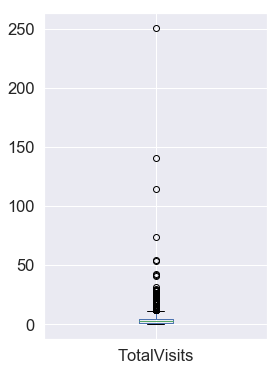

In [12]:
print('Percentage of Null:',round(100*(df['TotalVisits'].isnull().sum(axis = 0)/len(df)),2))
plt.figure(figsize=(4,6))
df.boxplot(column=['TotalVisits'])

<div class="alert alert-block alert-info">
<b>Note:</b> Column to be kept. Outliers to be removed.
</div>

### `Total Time Spent on Website`

Percentage of Null: 0.0


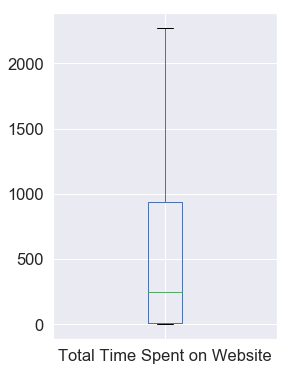

In [13]:
print('Percentage of Null:',round(100*(df['Total Time Spent on Website'].isnull().sum(axis = 0)/len(df)),2))
plt.figure(figsize=(4,6))
df.boxplot(column=['Total Time Spent on Website'])

<div class="alert alert-block alert-info">
<b>Note:</b> Column to be kept.
</div>

### `Page Views Per Visit`

Percentage of Null: 1.48


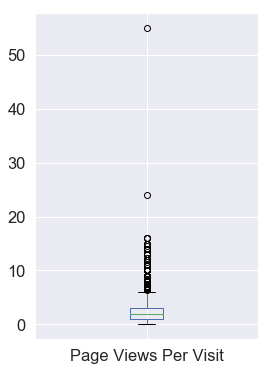

In [14]:
print('Percentage of Null:',round(100*(df['Page Views Per Visit'].isnull().sum(axis = 0)/len(df)),2))
plt.figure(figsize=(4,6))
df.boxplot(column=['Page Views Per Visit'])

<div class="alert alert-block alert-info">
<b>Note:</b> Column to be kept. Outliers to be removed.
</div>

### `Last Activity`

In [15]:
print('Percentage of Null:',round(100*(df['Last Activity'].isnull().sum(axis = 0)/len(df)),2))
round(df['Last Activity'].value_counts(normalize=True),2)

Percentage of Null: 1.11


Email Opened                    0.38
SMS Sent                        0.30
Olark Chat Conversation         0.11
Page Visited on Website         0.07
Converted to Lead               0.05
Email Bounced                   0.04
Email Link Clicked              0.03
Form Submitted on Website       0.01
Unreachable                     0.01
Unsubscribed                    0.01
Had a Phone Conversation        0.00
Approached upfront              0.00
View in browser link Clicked    0.00
Email Received                  0.00
Email Marked Spam               0.00
Resubscribed to emails          0.00
Visited Booth in Tradeshow      0.00
Name: Last Activity, dtype: float64

<div class="alert alert-block alert-info">
<b>Note:</b> This column to be merged with other similar column 'Last Notable Activity'
</div>

### `Country`

In [16]:
print('Percentage of Null:',round(100*(df['Country'].isnull().sum(axis = 0)/len(df)),2))
round(df['Country'].value_counts(),2)

Percentage of Null: 26.63


India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Canada                     4
Kuwait                     4
Germany                    4
South Africa               4
Nigeria                    4
Sweden                     3
Netherlands                2
Uganda                     2
China                      2
Italy                      2
Belgium                    2
Ghana                      2
Philippines                2
Bangladesh                 2
Asia/Pacific Region        2
Malaysia                   1
Denmark                    1
Tanzania                   1
Sri Lanka                  1
Vietnam                    1
Russia                     1
Liberia       

<div class="alert alert-block alert-info">
<b>Note:</b> Values to be merged.
</div>

### `Specialization`

In [17]:
print('Percentage of Null:',round(100*(df['Specialization'].isnull().sum(axis = 0)/len(df)),2))
round(df['Specialization'].value_counts(),2)

Percentage of Null: 15.56


Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

<div class="alert alert-block alert-info">
<b>Note:</b> Values to be merged
</div>

### `How did you hear about X Education`

In [18]:
print('Percentage of Null:',round(100*(df['How did you hear about X Education'].isnull().sum(axis = 0)/len(df)),2))
round(df['How did you hear about X Education'].value_counts(),2)

Percentage of Null: 23.89


Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

<div class="alert alert-block alert-success">
<b>Note:</b> This column tells the source of information, so it will be merged with other similar columns:
    <ul>
        <li>'Lead Source'</li>
        <li>'Search'</li>
        <li>'Newspaper Article'</li>
        <li>'X Education Forums'</li>
        <li>'Newspaper'</li>
        <li>'Digital Advertisement'</li>
        <li>'Through Recommendations'</li>
    </ul>
</div>

### `What is your current occupation`

In [19]:
print('Percentage of Null:',round(100*(df['What is your current occupation'].isnull().sum(axis = 0)/len(df)),2))
round(df['What is your current occupation'].value_counts(normalize=True),2)

Percentage of Null: 29.11


Unemployed              0.85
Working Professional    0.11
Student                 0.03
Other                   0.00
Housewife               0.00
Businessman             0.00
Name: What is your current occupation, dtype: float64

<div class="alert alert-block alert-info">
<b>Note:</b> Values to be merged.
</div>

### `What matters most to you in choosing a course`

In [20]:
print('Percentage of Null:',round(100*(df['What matters most to you in choosing a course'].isnull().sum(axis = 0)/len(df)),2))
round(df['What matters most to you in choosing a course'].value_counts(normalize=True),2)

Percentage of Null: 29.32


Better Career Prospects      1.0
Flexibility & Convenience    0.0
Other                        0.0
Name: What matters most to you in choosing a course, dtype: float64

<div class="alert alert-block alert-danger">
<b>Note:</b> Column to be removed.
</div>

### `Search`

In [21]:
print('Percentage of Null:',round(100*(df['Search'].isnull().sum(axis = 0)/len(df)),2))
round(df['Search'].value_counts(),2)

Percentage of Null: 0.0


No     9226
Yes      14
Name: Search, dtype: int64

<div class="alert alert-block alert-success">
<b>Note:</b> This column tells the source of information, so it will be merged with other similar columns:
    <ul>
        <li>'How did you hear about X Education'</li>
        <li>'Lead Source'</li>
        <li>'Newspaper Article'</li>
        <li>'X Education Forums'</li>
        <li>'Newspaper'</li>
        <li>'Digital Advertisement'</li>
        <li>'Through Recommendations'</li>
    </ul>
</div>

### `Magazine`

In [22]:
print('Percentage of Null:',round(100*(df['Magazine'].isnull().sum(axis = 0)/len(df)),2))
round(df['Magazine'].value_counts(normalize=True),2)

Percentage of Null: 0.0


No    1.0
Name: Magazine, dtype: float64

<div class="alert alert-block alert-danger">
<b>Note:</b> Column to be removed.
</div>

### `Newspaper Article`

In [23]:
print('Percentage of Null:',round(100*(df['Newspaper Article'].isnull().sum(axis = 0)/len(df)),2))
round(df['Newspaper Article'].value_counts(),2)

Percentage of Null: 0.0


No     9238
Yes       2
Name: Newspaper Article, dtype: int64

<div class="alert alert-block alert-success">
<b>Note:</b> This column tells the source of information, so it will be merged with other similar columns:
    <ul>
        <li>'How did you hear about X Education'</li>
        <li>'Search'</li>
        <li>'Lead Source'</li>
        <li>'X Education Forums'</li>
        <li>'Newspaper'</li>
        <li>'Digital Advertisement'</li>
        <li>'Through Recommendations'</li>
    </ul>
</div>

### `X Education Forums`

In [24]:
print('Percentage of Null:',round(100*(df['X Education Forums'].isnull().sum(axis = 0)/len(df)),2))
round(df['X Education Forums'].value_counts(),2)

Percentage of Null: 0.0


No     9239
Yes       1
Name: X Education Forums, dtype: int64

<div class="alert alert-block alert-success">
<b>Note:</b> This column tells the source of information, so it will be merged with other similar columns:
    <ul>
        <li>'How did you hear about X Education'</li>
        <li>'Search'</li>
        <li>'Newspaper Article'</li>
        <li>'Lead Source'</li>
        <li>'Newspaper'</li>
        <li>'Digital Advertisement'</li>
        <li>'Through Recommendations'</li>
    </ul>
</div>

### `Newspaper`

In [25]:
print('Percentage of Null:',round(100*(df['Newspaper'].isnull().sum(axis = 0)/len(df)),2))
round(df['Newspaper'].value_counts(),2)

Percentage of Null: 0.0


No     9239
Yes       1
Name: Newspaper, dtype: int64

<div class="alert alert-block alert-success">
<b>Note:</b> This column tells the source of information, so it will be merged with other similar columns:
    <ul>
        <li>'How did you hear about X Education'</li>
        <li>'Search'</li>
        <li>'Newspaper Article'</li>
        <li>'X Education Forums'</li>
        <li>'Lead Source'</li>
        <li>'Digital Advertisement'</li>
        <li>'Through Recommendations'</li>
    </ul>
</div>

### `Digital Advertisement`

In [26]:
print('Percentage of Null:',round(100*(df['Digital Advertisement'].isnull().sum(axis = 0)/len(df)),2))
round(df['Digital Advertisement'].value_counts(),2)

Percentage of Null: 0.0


No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

<div class="alert alert-block alert-success">
<b>Note:</b> This column tells the source of information, so it will be merged with other similar columns:
    <ul>
        <li>'How did you hear about X Education'</li>
        <li>'Search'</li>
        <li>'Newspaper Article'</li>
        <li>'X Education Forums'</li>
        <li>'Newspaper'</li>
        <li>'Lead Source'</li>
        <li>'Through Recommendations'</li>
    </ul>
</div>

### `Through Recommendations`

In [27]:
print('Percentage of Null:',round(100*(df['Through Recommendations'].isnull().sum(axis = 0)/len(df)),2))
round(df['Through Recommendations'].value_counts(),2)

Percentage of Null: 0.0


No     9233
Yes       7
Name: Through Recommendations, dtype: int64

<div class="alert alert-block alert-success">
<b>Note:</b> This column tells the source of information, so it will be merged with other similar columns:
    <ul>
        <li>'How did you hear about X Education'</li>
        <li>'Search'</li>
        <li>'Newspaper Article'</li>
        <li>'X Education Forums'</li>
        <li>'Newspaper'</li>
        <li>'Digital Advertisement'</li>
        <li>'Lead Source'</li>
    </ul>
</div>

### `Receive More Updates About Our Courses`

In [28]:
print('Percentage of Null:',round(100*(df['Receive More Updates About Our Courses'].isnull().sum(axis = 0)/len(df)),2))
round(df['Receive More Updates About Our Courses'].value_counts(normalize=True),2)

Percentage of Null: 0.0


No    1.0
Name: Receive More Updates About Our Courses, dtype: float64

<div class="alert alert-block alert-danger">
<b>Note:</b> Column to be removed.
</div>

### `Tags`

In [29]:
print('Percentage of Null:',round(100*(df['Tags'].isnull().sum(axis = 0)/len(df)),2))
round(df['Tags'].value_counts(normalize=True),2)

Percentage of Null: 36.29


Will revert after reading the email                  0.35
Ringing                                              0.20
Interested in other courses                          0.09
Already a student                                    0.08
Closed by Horizzon                                   0.06
switched off                                         0.04
Busy                                                 0.03
Lost to EINS                                         0.03
Not doing further education                          0.02
Interested  in full time MBA                         0.02
Graduation in progress                               0.02
invalid number                                       0.01
Diploma holder (Not Eligible)                        0.01
wrong number given                                   0.01
opp hangup                                           0.01
number not provided                                  0.00
in touch with EINS                                   0.00
Lost to Others

<div class="alert alert-block alert-danger">
<b>Note:</b> Column to be removed.
</div>

### `Update me on Supply Chain Content`

In [30]:
print('Percentage of Null:',round(100*(df['Update me on Supply Chain Content'].isnull().sum(axis = 0)/len(df)),2))
round(df['Update me on Supply Chain Content'].value_counts(normalize=True),2)

Percentage of Null: 0.0


No    1.0
Name: Update me on Supply Chain Content, dtype: float64

<div class="alert alert-block alert-danger">
<b>Note:</b> Column to be removed.
</div>

### `Get updates on DM Content`

In [31]:
print('Percentage of Null:',round(100*(df['Get updates on DM Content'].isnull().sum(axis = 0)/len(df)),2))
round(df['Get updates on DM Content'].value_counts(normalize=True),2)

Percentage of Null: 0.0


No    1.0
Name: Get updates on DM Content, dtype: float64

<div class="alert alert-block alert-danger">
<b>Note:</b> Column to be removed.
</div>

### `Lead Profile`

In [32]:
print('Percentage of Null:',round(100*(df['Lead Profile'].isnull().sum(axis = 0)/len(df)),2))
round(df['Lead Profile'].value_counts(),2)

Percentage of Null: 29.32


Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

<div class="alert alert-block alert-info">
<b>Note:</b> Values to be merged.
</div>

### `City`

In [33]:
print('Percentage of Null:',round(100*(df['City'].isnull().sum(axis = 0)/len(df)),2))
round(df['City'].value_counts(normalize=True),2)

Percentage of Null: 15.37


Mumbai                         0.41
Select                         0.29
Thane & Outskirts              0.10
Other Cities                   0.09
Other Cities of Maharashtra    0.06
Other Metro Cities             0.05
Tier II Cities                 0.01
Name: City, dtype: float64

<div class="alert alert-block alert-danger">
<b>Note:</b> <b>Column to be removed.</b> 15% null value + sparsely varied information
</div>

### `I agree to pay the amount through cheque`

In [34]:
print('Percentage of Null:',round(100*(df['I agree to pay the amount through cheque'].isnull().sum(axis = 0)/len(df)),2))
round(df['I agree to pay the amount through cheque'].value_counts(normalize=True),2)

Percentage of Null: 0.0


No    1.0
Name: I agree to pay the amount through cheque, dtype: float64

<div class="alert alert-block alert-danger">
<b>Note:</b> Column to be removed
</div>

### `A free copy of Mastering The Interview`

In [35]:
print('Percentage of Null:',round(100*(df['A free copy of Mastering The Interview'].isnull().sum(axis = 0)/len(df)),2))
round(df['A free copy of Mastering The Interview'].value_counts(normalize=True),2)

Percentage of Null: 0.0


No     0.69
Yes    0.31
Name: A free copy of Mastering The Interview, dtype: float64

<div class="alert alert-block alert-info">
<b>Note:</b> Column to be kept.
</div>

### `Last Notable Activity`

In [36]:
print('Percentage of Null:',round(100*(df['Last Notable Activity'].isnull().sum(axis = 0)/len(df)),2))
round(df['Last Notable Activity'].value_counts(normalize=True),2)

Percentage of Null: 0.0


Modified                        0.37
Email Opened                    0.31
SMS Sent                        0.24
Page Visited on Website         0.03
Olark Chat Conversation         0.02
Email Link Clicked              0.02
Email Bounced                   0.01
Unsubscribed                    0.01
Unreachable                     0.00
Had a Phone Conversation        0.00
Email Marked Spam               0.00
Form Submitted on Website       0.00
Email Received                  0.00
Approached upfront              0.00
View in browser link Clicked    0.00
Resubscribed to emails          0.00
Name: Last Notable Activity, dtype: float64

<div class="alert alert-block alert-info">
<b>Note:</b> This column to be merged with other similar column 'Last Activity'
</div>

### Dropping columns with high no. of missing values and useless ones

- 'Prospect ID',
- 'Lead Number',
- 'Do Not Email',
- 'Do Not Call',
- 'What matters most to you in choosing a course',
- 'Receive More Updates About Our Courses',
- 'Tags',
- 'Lead Quality',
- 'Update me on Supply Chain Content',
- 'Get updates on DM Content',
- 'City',
- 'Asymmetrique Activity Index',
- 'Asymmetrique Profile Index',
- 'Asymmetrique Activity Score',
- 'Asymmetrique Profile Score',
- 'I agree to pay the amount through cheque'

In [37]:
# dropping useless columns

df.drop(['Prospect ID',
         'Lead Number',
         'Do Not Email',
         'Do Not Call',
         'What matters most to you in choosing a course',
         'Receive More Updates About Our Courses',
         'Tags',
         'Lead Quality',
         'Update me on Supply Chain Content',
         'Get updates on DM Content',
         'City',
         'Asymmetrique Activity Index',
         'Asymmetrique Profile Index',
         'Asymmetrique Activity Score',
         'Asymmetrique Profile Score',
         'I agree to pay the amount through cheque'], 
        axis = 1, inplace=True)

### Outliers being removed for 'TotalVisits'

In [38]:
# quantile chart
print(df['TotalVisits'].quantile([0.0, 0.25, 0.5, 0.75, 0.99, 1.0])) 

# cutoff = 99th quantile
outliar_cutoff = round(tuple(df['TotalVisits'].quantile([0.99]))[0],4) 

# no. of outliars found
outliar_count = len(df[df['TotalVisits'] > outliar_cutoff]) 

print("\n", outliar_count,"rows out of ",rows, "= ", round((outliar_count/rows)*100,2),"%")

# dropping outliars
df.drop(df[df['TotalVisits']>outliar_cutoff].index, inplace = True)

0.00      0.0
0.25      1.0
0.50      3.0
0.75      5.0
0.99     17.0
1.00    251.0
Name: TotalVisits, dtype: float64

 83 rows out of  9240 =  0.9 %


<div class="alert alert-block alert-danger">
<b>Note:</b> It is safe to delete 0.9 % of data.
</div>

### Outliers being removed for 'Page Views Per Visit'

In [39]:
# quantile chart
print(df['Page Views Per Visit'].quantile([0.0, 0.25, 0.5, 0.75, 0.99, 1.0]))  

# cutoff = 99th quantile
outliar_cutoff = round(tuple(df['Page Views Per Visit'].quantile([0.99]))[0],4)  

# no. of outliars found
outliar_count = len(df[df['Page Views Per Visit'] > outliar_cutoff])  

print("\n", outliar_count,"rows out of ",rows, "= ", round((outliar_count/rows)*100,2),"%")

# dropping outliars
df.drop(df[df['Page Views Per Visit']>outliar_cutoff].index, inplace = True)

0.00     0.0
0.25     1.0
0.50     2.0
0.75     3.0
0.99     9.0
1.00    16.0
Name: Page Views Per Visit, dtype: float64

 67 rows out of  9240 =  0.73 %


<div class="alert alert-block alert-danger">
<b>Note:</b> It is safe to delete 0.73 % of data.
</div>

### Merging 'Last Activity' and 'Last Notable Activity' columns into one

In [40]:
# function to keep the values with most no. of counts
def activity(df):

    if ((df['Last Activity'] == 'Email Opened') | (df['Last Notable Activity'] == 'Email Opened')):
        return 'Email Opened'
    elif ((df['Last Activity'] == 'SMS Sent') | (df['Last Notable Activity'] == 'SMS Sent')):
        return 'SMS Sent'
    elif (df['Last Notable Activity'] == 'Modified'):
        return 'Modification'    
    else:
        return 'Others'

# creating new column to repesent the merged two columns
df['Activity'] = df.apply(activity, axis = 1)

# dropping old columns
df.drop(['Last Activity', 'Last Notable Activity'], axis = 1, inplace=True)


### Merging multiple similar columns which only tells the source of information to customers:

- 'How did you hear about X Education'
- 'Search'
- 'Newspaper Article'
- 'X Education Forums'
- 'Newspaper'
- 'Digital Advertisement'
- 'Lead Source'
- 'Through Recommendations'

In [41]:
# function to merge them all and keep the values with high count
def info_source(df):

    if ((df['How did you hear about X Education'] == 'Online Search') | 
        (df['Lead Source'] == 'Google') |
        (df['Lead Source'] == 'Direct Traffic') |
        (df['Lead Source'] == 'Organic Search') |
        (df['Lead Source'] == 'Welingak Website') |
        (df['Lead Source'] == 'Referral sites') |
        (df['Lead Source'] == 'bing') |
        (df['Lead Source'] == 'google') |
        (df['Lead Source'] == 'Click2call') |
        (df['Lead Source'] == 'Olark Chat') |
        (df['Lead Source'] == 'Live Chat') |
        (df['Search'] == 'Yes')):
        return 'Online Search'
    
    elif ((df['How did you hear about X Education'] == 'Advertisements') | 
          (df['How did you hear about X Education'] == 'Social Media') |
          (df['How did you hear about X Education'] == 'Email') | 
          (df['How did you hear about X Education'] == 'SMS') |
          (df['Lead Source'] == 'Facebook') |
          (df['Lead Source'] == 'Press_Release') |
          (df['Lead Source'] == 'Social Media') |
          (df['Lead Source'] == 'youtubechannel') |
          (df['Newspaper Article'] == 'Yes') |
          (df['Newspaper'] == 'Yes') |
          (df['Digital Advertisement'] == 'Yes')):
        return 'Social Media and Ads'
    
    elif ((df['How did you hear about X Education'] == 'Word Of Mouth') | 
          (df['How did you hear about X Education'] == 'Student of SomeSchool') |
          (df['Lead Source'] == 'Reference') |
          (df['Through Recommendations'] == 'Yes')):
        return 'Recommendation'
    
    elif ((df['How did you hear about X Education'] == 'Other') | 
          (df['How did you hear about X Education'] == 'Multiple Sources') |
          (df['Lead Source'] == 'testone') |
          (df['Lead Source'] == 'NC_EDM') |
          (df['Lead Source'] == 'welearnblog_Home') |
          (df['Lead Source'] == 'Pay per Click Ads') |
          (df['Lead Source'] == 'blog') |
          (df['Lead Source'] == 'WeLearn') |
          (df['X Education Forums'] == 'Yes')):
        return 'Others'
    else:
        return np.nan

# creating new column to show merged columns
df['Information Source'] = df.apply(info_source, axis = 1)

# dropping old columns
df.drop(['Lead Source', 
         'How did you hear about X Education',
         'Search',
         'Magazine',
         'Newspaper Article',
         'X Education Forums',
         'Newspaper',
         'Digital Advertisement',
         'Through Recommendations'], axis = 1, inplace=True)

### Merging values of 'Lead Origin' to reduce variance

In [42]:
df['Lead Origin'].loc[(df['Lead Origin'] == 'Landing Page Submission')] = 'Page submission'  # shortening long name

df['Lead Origin'].loc[(df['Lead Origin'] == 'Lead Add Form')] = 'Other origin'
df['Lead Origin'].loc[(df['Lead Origin'] == 'Lead Import')] = 'Other origin'
df['Lead Origin'].loc[(df['Lead Origin'] == 'Quick Add Form')] = 'Other origin'

### Imputing column 'Country' and merging values to reduce variance

In [43]:
df['Country'].replace(np.nan, 'India', inplace=True) # null values
df['Country'].loc[(df['Country'] != 'India')] = 'Foreign'

### Merging values of 'Specialization' to reduce variance

In [44]:
df['Specialization'].replace(np.nan, 'Others2', inplace=True)  # null values
df['Specialization'].loc[(df['Specialization'] == 'Select')] = 'Others2'  # null values

df['Specialization'].loc[(df['Specialization'] == 'Media and Advertising')] = 'Other'
df['Specialization'].loc[(df['Specialization'] == 'Travel and Tourism')] = 'Other'
df['Specialization'].loc[(df['Specialization'] == 'International Business')] = 'Other'
df['Specialization'].loc[(df['Specialization'] == 'Healthcare Management')] = 'Other'
df['Specialization'].loc[(df['Specialization'] == 'Hospitality Management')] = 'Other'
df['Specialization'].loc[(df['Specialization'] == 'E-COMMERCE')] = 'Other'
df['Specialization'].loc[(df['Specialization'] == 'Retail Management')] = 'Other'
df['Specialization'].loc[(df['Specialization'] == 'Rural and Agribusiness')] = 'Other'
df['Specialization'].loc[(df['Specialization'] == 'E-Business')] = 'Other'
df['Specialization'].loc[(df['Specialization'] == 'Services Excellence')] = 'Other'

# shortening left-over label names
df['Specialization'].loc[(df['Specialization'] == 'Finance Management')] = 'Finance'
df['Specialization'].loc[(df['Specialization'] == 'Human Resource Management')] = 'HR'
df['Specialization'].loc[(df['Specialization'] == 'Marketing Management')] = 'Marketing'
df['Specialization'].loc[(df['Specialization'] == 'Operations Management')] = 'Operations'
df['Specialization'].loc[(df['Specialization'] == 'Business Administration')] = 'BA'
df['Specialization'].loc[(df['Specialization'] == 'IT Projects Management')] = 'IT projects'
df['Specialization'].loc[(df['Specialization'] == 'Supply Chain Management')] = 'Supply Chain'
df['Specialization'].loc[(df['Specialization'] == 'Banking, Investment And Insurance')] = 'Banking'

### Merging values of 'What is your current occupation' to reduce variance

In [45]:
df['What is your current occupation'].replace(np.nan, 'Others2', inplace=True) # null values

df['What is your current occupation'].loc[(df['What is your current occupation'] == 'Student')] = 'Unemployed'
df['What is your current occupation'].loc[(df['What is your current occupation'] == 'Other')] = 'Unemployed'
df['What is your current occupation'].loc[(df['What is your current occupation'] == 'Housewife')] = 'Unemployed'
df['What is your current occupation'].loc[(df['What is your current occupation'] == 'Businessman')] = 'Unemployed'

### Merging values of 'Lead Profile' to reduce variance

In [46]:
df['Lead Profile'].replace(np.nan, 'Others2', inplace=True) # null values
df['Lead Profile'].loc[(df['Lead Profile'] == 'Select')] = 'Others2' # null values

df['Lead Profile'].loc[(df['Lead Profile'] == 'Potential Lead')] = 'Lead'
df['Lead Profile'].loc[(df['Lead Profile'] == 'Other Leads')] = 'Lead'
df['Lead Profile'].loc[(df['Lead Profile'] == 'Student of SomeSchool')] = 'Roughly lead'
df['Lead Profile'].loc[(df['Lead Profile'] == 'Lateral Student')] = 'Roughly lead'
df['Lead Profile'].loc[(df['Lead Profile'] == 'Dual Specialization Student')] = 'Roughly lead'

### Imputing left over columns

In [47]:
df['TotalVisits'].replace(np.nan, df['TotalVisits'].mean(), inplace=True)  # imputing mean
df['Page Views Per Visit'].replace(np.nan, df['Page Views Per Visit'].mean(), inplace=True)  # imputing mean
df['Information Source'].replace(np.nan, df['Information Source'].mode()[0], inplace=True)  # imputing mode

### Renaming long column names

In [48]:
df.rename(columns = {'Total Time Spent on Website':'Time spent', 
                     'Page Views Per Visit':'Page views', 
                     'What is your current occupation':'Occupation', 
                     'A free copy of Mastering The Interview':'Interview copy'}, inplace = True)

# <span style="color: red;">Final Cleaned Dataset</span>

In [49]:
df.tail()

,Lead Origin,Converted,TotalVisits,Time spent,Page views,Country,Specialization,Occupation,Lead Profile,Interview copy,Activity,Information Source
9235,Page submission,1,8.0,1845,2.67,Foreign,IT projects,Unemployed,Lead,No,Others,Online Search
9236,Page submission,0,2.0,238,2.00,India,Other,Unemployed,Lead,Yes,SMS Sent,Online Search
9237,Page submission,0,2.0,199,2.00,India,BA,Unemployed,Lead,Yes,SMS Sent,Online Search
9238,Page submission,1,3.0,499,3.00,India,HR,Others2,Others2,No,SMS Sent,Online Search
9239,Page submission,1,6.0,1279,3.00,Foreign,Supply Chain,Unemployed,Lead,Yes,SMS Sent,Online Search


In [50]:
clean_set=df.shape
print('Original shape:',original_shape)
print('Cleaned dataset shape:',clean_set)

Original shape: (9240, 37)
Cleaned dataset shape: (9090, 12)


<div class="alert alert-block alert-info">
<b>NOTE: 150 rows of outliars and 25 unproductive columns were removed. </b> 
</div>

In [51]:
df.isnull().sum()

Lead Origin           0
Converted             0
TotalVisits           0
Time spent            0
Page views            0
Country               0
Specialization        0
Occupation            0
Lead Profile          0
Interview copy        0
Activity              0
Information Source    0
dtype: int64

<div class="alert alert-block alert-info">
<b>Note:</b> No null values.
</div>

### Data infomation

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9090 entries, 0 to 9239
Data columns (total 12 columns):
Lead Origin           9090 non-null object
Converted             9090 non-null int64
TotalVisits           9090 non-null float64
Time spent            9090 non-null int64
Page views            9090 non-null float64
Country               9090 non-null object
Specialization        9090 non-null object
Occupation            9090 non-null object
Lead Profile          9090 non-null object
Interview copy        9090 non-null object
Activity              9090 non-null object
Information Source    9090 non-null object
dtypes: float64(2), int64(2), object(8)
memory usage: 923.2+ KB


### Data description

In [53]:
df.describe()

,Converted,TotalVisits,Time spent,Page views
count,9090.000000,9090.000000,9090.000000,9090.000000
mean,0.384488,3.143081,484.243784,2.266858
std,0.486501,2.881831,547.243973,1.880883
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,9.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,4.000000,930.000000,3.000000
max,1.000000,17.000000,2272.000000,9.000000


In [54]:
df[['Lead Origin', 
    'Country', 
    'Specialization', 
    'Occupation', 
    'Lead Profile', 
    'Interview copy', 
    'Activity', 
    'Information Source']].describe()

,Lead Origin,Country,Specialization,Occupation,Lead Profile,Interview copy,Activity,Information Source
count,9090,9090,9090,9090,9090,9090,9090,9090
unique,3,2,10,3,3,2,4,4
top,Page submission,India,Others2,Unemployed,Others2,No,Email Opened,Online Search
freq,4769,8807,3360,5746,6744,6292,3390,8490


In [55]:
# code to classify categorical and continuous columns

columns=list(df.columns) # list of columns
data_type=[]             # data type to be inserted
for cols in columns:
        count=len(dict(df[cols].value_counts()))
        if count > 10:
            data_type.append("Continuous")
        else:
            data_type.append("Category")
    
column_type = dict(zip(columns, data_type)) # dictionary of COLUMNS <-> DATA_TYPE
column_type = pd.DataFrame(list(column_type.items()),columns = ['COLUMN','TYPE']) # converting dictionary to dataframe

column_type

,COLUMN,TYPE
0,Lead Origin,Category
1,Converted,Category
2,TotalVisits,Continuous
3,Time spent,Continuous
4,Page views,Continuous
5,Country,Category
6,Specialization,Category
7,Occupation,Category
8,Lead Profile,Category
9,Interview copy,Category


# <span style="color: blue;"> 4. Univariate Analysis </span>

## 4.1 Categorical Data

### Analysis for 'Lead Origin' column

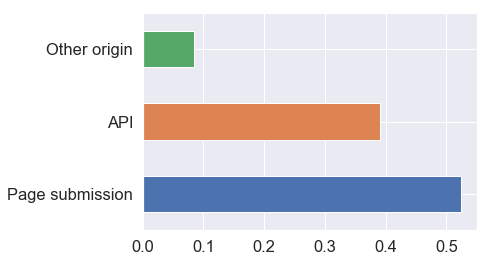

In [56]:
df['Lead Origin'].value_counts(normalize=True).plot.barh()
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> Maximum no. of lead origin was found by page submission.
</div>

### Analysis for 'Country' column

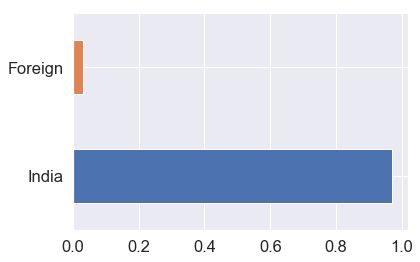

In [57]:
df['Country'].value_counts(normalize=True).plot.barh()
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> Most no. of customers are Indians.
</div>

### Analysis for 'Specialization' column

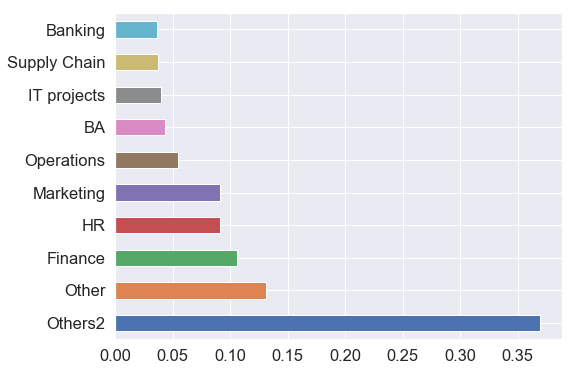

In [58]:
plt.figure(figsize=(8,6))
df['Specialization'].value_counts(normalize=True).plot.barh()
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> 
    <li> 'Other Specialization' consists of several distinct small business type work profiles.</li> 
    <li> 'Others2' is all null values.</li>
</div>

### Analysis for 'Occupation' column

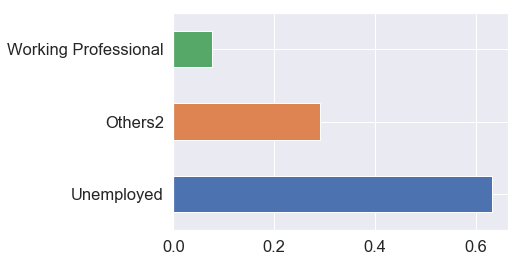

In [59]:
df['Occupation'].value_counts(normalize=True).plot.barh()
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> Most of the customers are unemployed.
</div>

### Analysis for 'Lead Profile' column

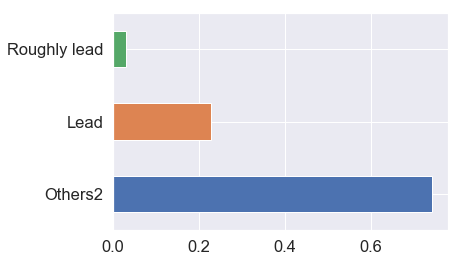

In [60]:
df['Lead Profile'].value_counts(normalize=True).plot.barh()
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> 
    <li>'Others2' are null values</li>
    <li>A decent no. of customers are leads and a small proportion is roughly lead.</li>
</div>

### Analysis for 'Interview copy' column

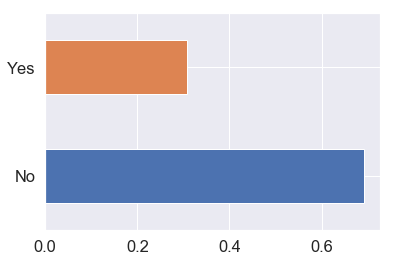

In [61]:
df['Interview copy'].value_counts(normalize=True).plot.barh()
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> Most of the customers are interested to have a free copy of mastering interview.
</div>

### Analysis for 'Activity' column

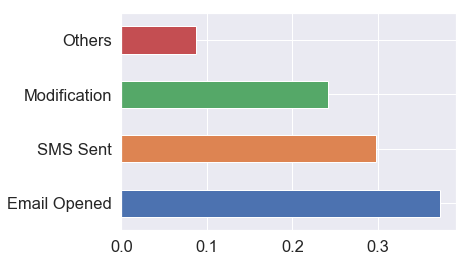

In [62]:
df['Activity'].value_counts(normalize=True).plot.barh()
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> Some of the last activities observed in high frequency were opening an email, SMS being received and some modification.
</div>

### Analysis for 'Information Source' column

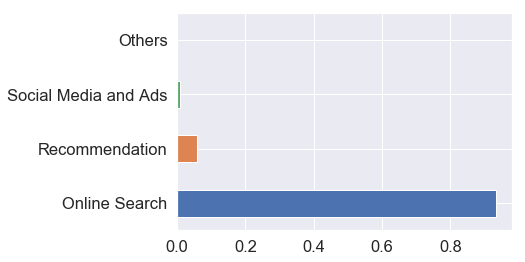

In [63]:
df['Information Source'].value_counts(normalize=True).plot.barh()
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> The source of information about X Education were mostly by online search.
</div>

### Analysis for 'Converted' column

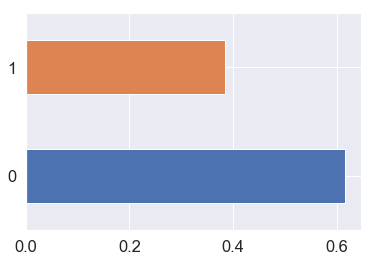

In [64]:
df['Converted'].value_counts(normalize=True).plot.barh()
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> A good no. of customers were converted to leads.
</div>

## 4.2 Numerical data

### Analysis for 'TotalVisits' column

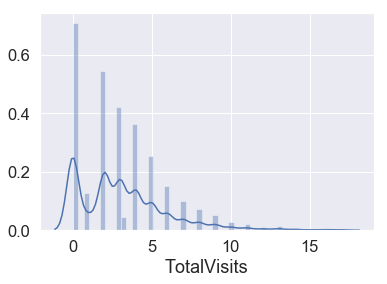

In [65]:
#plt.figure(figsize=(10,4))
sns.distplot(df['TotalVisits'])
plt.show()

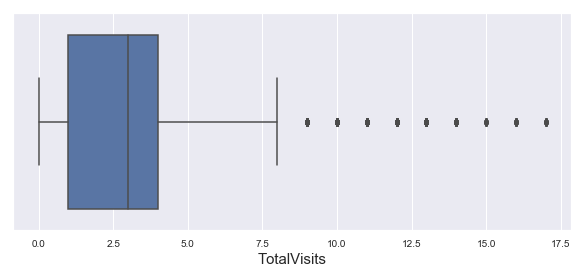

In [66]:
plt.figure(figsize=[10,4])
plt.rc('xtick', labelsize=10)
plt.xlabel("TotalVisits",fontsize=15)
sns.boxplot(df['TotalVisits'])
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> Tolerable amout of outliars.
</div>

### Analysis for 'Time spent' column

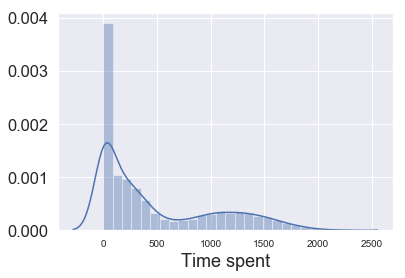

In [67]:
sns.distplot(df['Time spent'])
plt.show()

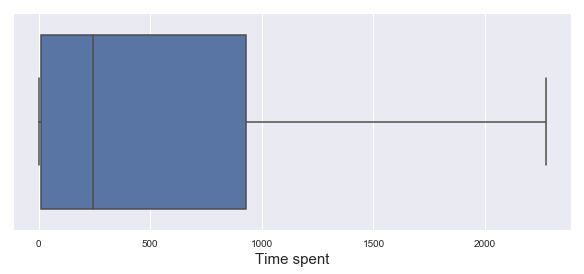

In [68]:
plt.figure(figsize=[10,4])
plt.rc('xtick', labelsize=10)
plt.xlabel("Time spent",fontsize=15)
sns.boxplot(df['Time spent'])
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> No outliars.
</div>

### Analysis for 'Page views' column

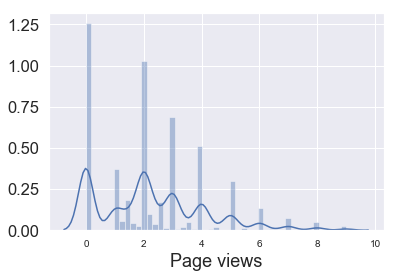

In [69]:
sns.distplot(df['Page views'])
plt.show()

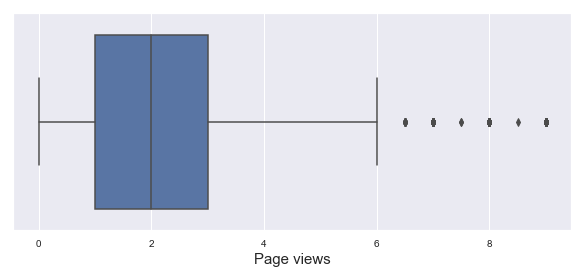

In [70]:
plt.figure(figsize=[10,4])
plt.rc('xtick', labelsize=10)
plt.xlabel("Page views",fontsize=15)
sns.boxplot(df['Page views'])
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> Tolerable amout of outliars.
</div>

# <span style="color: blue;"> 5. Bivariate Analysis </span>

## 5.1 Numeric to Numeric columns

###  'TotalVisits' vs 'Time spent' 

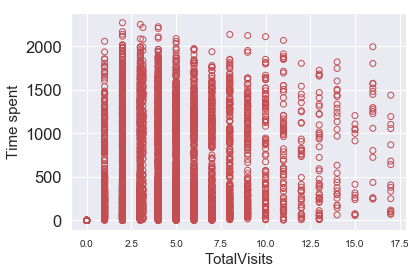

In [71]:
plt.xlabel("TotalVisits",fontsize=15)
plt.ylabel("Time spent",fontsize=15)
plt.scatter(df['TotalVisits'], df['Time spent'], facecolors='none', edgecolors='r')
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> No Correlation.
</div>

### 'Time spent' vs 'Page views'

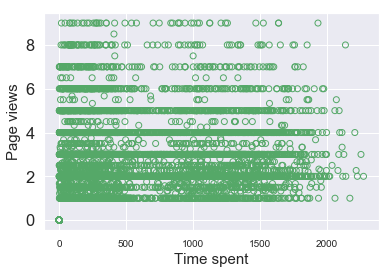

In [72]:
plt.xlabel("Time spent",fontsize=15)
plt.ylabel("Page views",fontsize=15)
plt.scatter(df['Time spent'], df['Page views'], facecolors='none', edgecolors='g')
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> No Correlation.
</div>

###  'TotalVisits' vs 'Page views'

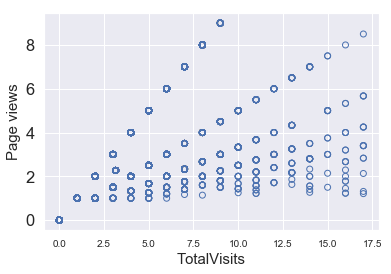

In [73]:
plt.xlabel("TotalVisits",fontsize=15)
plt.ylabel("Page views",fontsize=15)
plt.scatter(df['TotalVisits'], df['Page views'], facecolors='none', edgecolors='b')
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> There's a good positive correlation between 'TotalVisits' & 'Page views'
</div>

### Pairplot

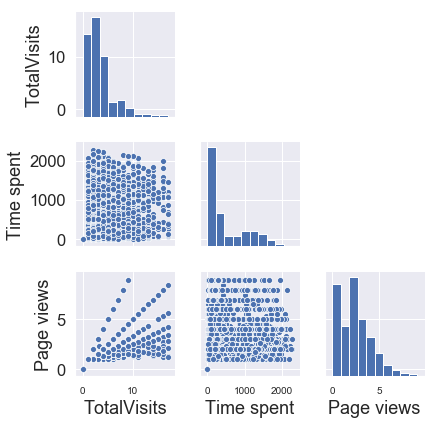

In [74]:
pair = sns.pairplot(data=df, height=2, vars=['TotalVisits','Time spent','Page views'])
for i, j in zip(*np.triu_indices_from(pair.axes, 1)):
    pair.axes[i, j].set_visible(False)
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> All numeric columns' pairplot.
</div>

### Correlation Matrix

In [75]:
correlation = df[['TotalVisits','Time spent','Page views']].corr()

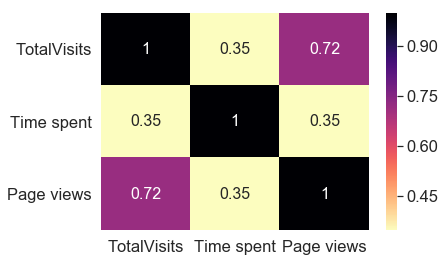

In [76]:
plt.rcParams['font.size'] = 20
sns.set(font_scale=1.5)
sns.heatmap(correlation, annot=True, cmap='magma_r', annot_kws={"size": 16},
           xticklabels=list(correlation.columns.values), yticklabels=list(correlation.columns.values))

<div class="alert alert-block alert-info">
<b>Note:</b> 'TotalVisits' and 'Page views' are highly correlated.
</div>

## 5.2 Numeric to Categorical Data

### 'Converted' vs 'TotalVisits'

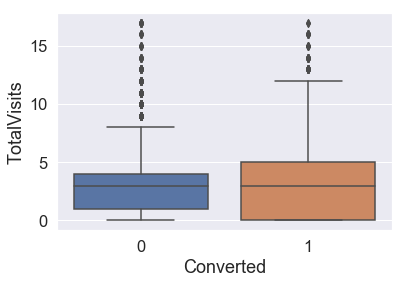

In [77]:
#plt.figure(figsize=(6,8))
sns.boxplot(data=df, x='Converted', y='TotalVisits')
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> There's slight difference between the two. Those who got converted to 'leads' had made more visits to the website.
</div>

### 'Converted' vs 'Time spent'

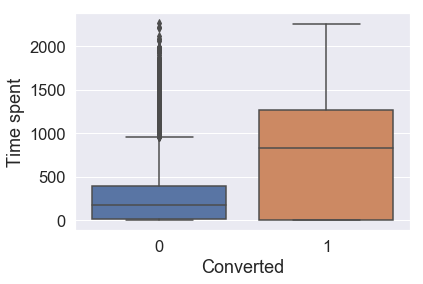

In [78]:
sns.boxplot(data=df, x='Converted', y='Time spent')
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> Here those who converted to 'leads' had spent significantly more time on the website.
</div>

### 'Converted' vs 'Page views'

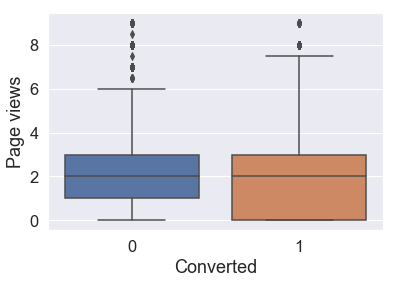

In [79]:
sns.boxplot(data=df, x='Converted', y='Page views')
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> In this graph, those who converted to 'leads' had visited many of pages of the website.
</div>

## 5.3 Categorical to Categorical Data

### 'Specialization' vs 'Converted'

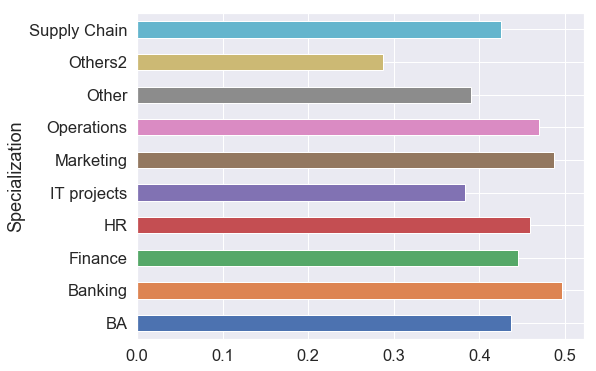

In [80]:
plt.figure(figsize=(8,6))
df.groupby('Specialization')['Converted'].mean().plot.barh()
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> So, these are all the people working in some sector. The employed one's are almost equally interested in X Education courses.
</div>

### 'Occupation' vs 'Converted'

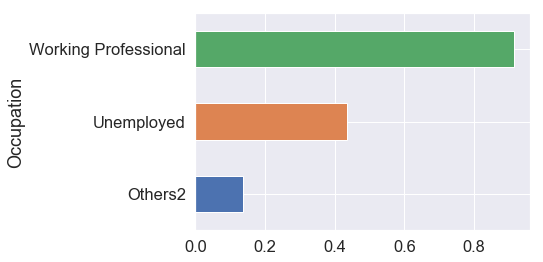

In [81]:
#plt.figure(figsize=(8,6))
df.groupby('Occupation')['Converted'].mean().plot.barh()
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> Those who got converted to 'leads' were mostly working professionals.
</div>

### 'Information Source' vs 'Converted'

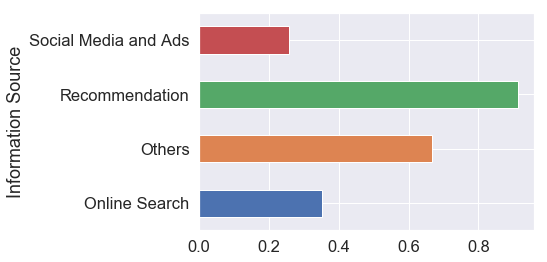

In [82]:
#plt.figure(figsize=(8,6))
df.groupby('Information Source')['Converted'].mean().plot.barh()
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> Those who got converted to 'leads' were mostly the recommended one's.
</div>

#  <span style="color: blue;"> 6. Multivariate Analysis </span>

### Link between 'Specialization' & 'Information Source' by 'Converted' value

In [83]:
result=pd.pivot_table(data=df, index='Information Source', columns= 'Specialization', values='Converted')
result.drop(['Others'], axis = 0, inplace=True)
result.drop(['Others2'], axis = 1, inplace=True)
result

Specialization,BA,Banking,Finance,HR,IT projects,Marketing,Operations,Other,Supply Chain
Information Source,,,,,,,,,
Online Search,0.400545,0.451505,0.397714,0.409880,0.365714,0.438762,0.441365,0.368838,0.403077
Recommendation,1.000000,0.965517,0.962500,0.921053,1.000000,0.905882,0.964286,0.914894,1.000000
Social Media and Ads,0.500000,NaN,0.500000,0.800000,NaN,NaN,0.000000,0.375000,0.333333


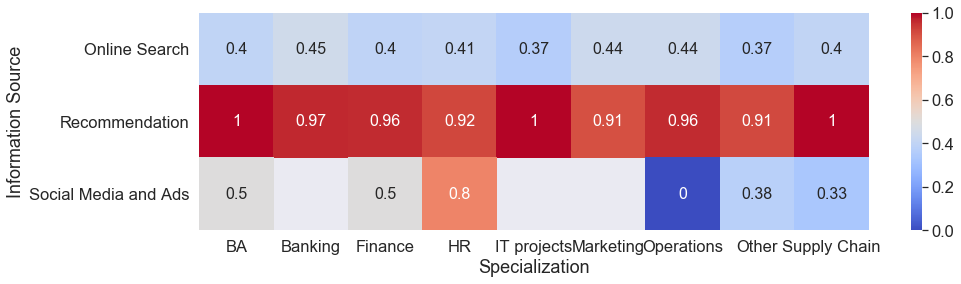

In [84]:
plt.figure(figsize=(15,4))
plt.rcParams['font.size'] = 20
sns.set(font_scale=1.5)
sns.heatmap(result, annot=True, cmap='coolwarm', annot_kws={"size": 16},
           xticklabels=list(result.columns.values), yticklabels=list(result.index.values))
plt.xticks(rotation=0)
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> 
    <li>The white ones left unlabeled have no common 'Converted' value b/w 'Specialization' & 'Information Source'. No relation.</li>
    <li>The red coloured ones show how strongly 'Specialization' & 'Information Source' are correlated depending on common 'Converted' value. </li>
    <li>The blue coloured ones show how weakly 'Specialization' & 'information Source' are correlated depending on common 'Converted' value. </li>
    <li>This means that Working professionals who got converted to 'leads' mostly came through 'Recommendation' than 'Online Search' or 'Social Media and Ads'</li>
</div>

#  <span style="color: red;"> Building Logistic Regression Model </span>

In [85]:
# importing important libraries

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [86]:
# cleaned dataset

print(df.shape)
df.head()

(9090, 12)


,Lead Origin,Converted,TotalVisits,Time spent,Page views,Country,Specialization,Occupation,Lead Profile,Interview copy,Activity,Information Source
0,API,0,0.0,0,0.0,India,Others2,Unemployed,Others2,No,Modification,Online Search
1,API,0,5.0,674,2.5,India,Others2,Unemployed,Others2,No,Email Opened,Online Search
2,Page submission,1,2.0,1532,2.0,India,BA,Unemployed,Lead,Yes,Email Opened,Online Search
3,Page submission,0,1.0,305,1.0,India,Other,Unemployed,Others2,No,Modification,Online Search
4,Page submission,1,2.0,1428,1.0,India,Others2,Unemployed,Others2,No,Modification,Online Search


## Data preparation

### `Creating dummy variables for all the categorical columns`

In [87]:
# Creating dummy variables for 'Lead Origin'
dummy_Origin = pd.get_dummies(df['Lead Origin'], prefix='Origin')
dummy_Origin.drop(['Origin_Other origin'], axis = 1, inplace=True)

# Creating dummy variables for 'Country'
dummy_Country = pd.get_dummies(df['Country'], prefix='Country')
dummy_Country.drop(['Country_Foreign'], axis = 1, inplace=True)

# Creating dummy variables for 'Specialization'
dummy_Specialization = pd.get_dummies(df['Specialization'], prefix='Specialization')
dummy_Specialization.drop(['Specialization_Others2'], axis = 1, inplace=True)

# Creating dummy variables for 'Occupation'
dummy_Occupation = pd.get_dummies(df['Occupation'], prefix='Occupation')
dummy_Occupation.drop(['Occupation_Others2'], axis = 1, inplace=True)

# Creating dummy variables for 'Lead Profile'
dummy_Profile = pd.get_dummies(df['Lead Profile'], prefix='Profile')
dummy_Profile.drop(['Profile_Others2'], axis = 1, inplace=True)

# Creating dummy variables for 'Interview copy'
dummy_Interview = pd.get_dummies(df['Interview copy'], prefix='Interview')
dummy_Interview.drop(['Interview_No'], axis = 1, inplace=True)

# Creating dummy variables for 'Activity'
dummy_Activity = pd.get_dummies(df['Activity'], prefix='Activity')
dummy_Activity.drop(['Activity_Others'], axis = 1, inplace=True)

# Creating dummy variables for 'Information Source'
dummy_Information = pd.get_dummies(df['Information Source'], prefix='Info')
dummy_Information.drop(['Info_Others'], axis = 1, inplace=True)

# concatenating all the dummy variables with dataframe
df = pd.concat([df, 
                dummy_Origin, 
                dummy_Country, 
                dummy_Specialization, 
                dummy_Occupation, 
                dummy_Profile,
                dummy_Interview,
                dummy_Activity,
                dummy_Information], axis = 1)

# dropping old categorical columns 
df.drop(['Lead Origin',
         'Country',
         'Specialization',
         'Occupation',
         'Lead Profile',
         'Interview copy',
         'Activity',
         'Information Source'], axis = 1, inplace=True)

In [88]:
df.tail()

,Converted,TotalVisits,Time spent,Page views,Origin_API,Origin_Page submission,Country_India,Specialization_BA,Specialization_Banking,Specialization_Finance,Specialization_HR,Specialization_IT projects,Specialization_Marketing,Specialization_Operations,Specialization_Other,Specialization_Supply Chain,Occupation_Unemployed,Occupation_Working Professional,Profile_Lead,Profile_Roughly lead,Interview_Yes,Activity_Email Opened,Activity_Modification,Activity_SMS Sent,Info_Online Search,Info_Recommendation,Info_Social Media and Ads
9235,1,8.0,1845,2.67,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
9236,0,2.0,238,2.00,0,1,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,1,0,0
9237,0,2.0,199,2.00,0,1,1,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,1,0,0
9238,1,3.0,499,3.00,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
9239,1,6.0,1279,3.00,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,1,1,0,0


In [89]:
model_shape=df.shape
print('Original data shape:',original_shape)
print('Cleaned data shape:',clean_set)
print('Model data shape:',model_shape)

Original data shape: (9240, 37)
Cleaned data shape: (9090, 12)
Model data shape: (9090, 27)


<div class="alert alert-block alert-info">
<b>Note:</b> Data shapes after each transformation.
</div>

In [90]:
# model data information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9090 entries, 0 to 9239
Data columns (total 27 columns):
Converted                          9090 non-null int64
TotalVisits                        9090 non-null float64
Time spent                         9090 non-null int64
Page views                         9090 non-null float64
Origin_API                         9090 non-null uint8
Origin_Page submission             9090 non-null uint8
Country_India                      9090 non-null uint8
Specialization_BA                  9090 non-null uint8
Specialization_Banking             9090 non-null uint8
Specialization_Finance             9090 non-null uint8
Specialization_HR                  9090 non-null uint8
Specialization_IT projects         9090 non-null uint8
Specialization_Marketing           9090 non-null uint8
Specialization_Operations          9090 non-null uint8
Specialization_Other               9090 non-null uint8
Specialization_Supply Chain        9090 non-null uint8
Occupatio

In [91]:
df.isnull().sum()

Converted                          0
TotalVisits                        0
Time spent                         0
Page views                         0
Origin_API                         0
Origin_Page submission             0
Country_India                      0
Specialization_BA                  0
Specialization_Banking             0
Specialization_Finance             0
Specialization_HR                  0
Specialization_IT projects         0
Specialization_Marketing           0
Specialization_Operations          0
Specialization_Other               0
Specialization_Supply Chain        0
Occupation_Unemployed              0
Occupation_Working Professional    0
Profile_Lead                       0
Profile_Roughly lead               0
Interview_Yes                      0
Activity_Email Opened              0
Activity_Modification              0
Activity_SMS Sent                  0
Info_Online Search                 0
Info_Recommendation                0
Info_Social Media and Ads          0
d

<div class="alert alert-block alert-info">
<b>Note:</b> No null values.
</div>

## Train-Test Split

In [92]:
# feature variables
X = df.drop(['Converted'], axis=1)

# target variable
Y = df['Converted']

# Splitting the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

## Rescaling Train Data

In [93]:
# using standard scaler

scaler = StandardScaler()
X_train[['TotalVisits','Time spent','Page views']] = scaler.fit_transform(X_train[['TotalVisits','Time spent','Page views']]) 

## Correlation matrix

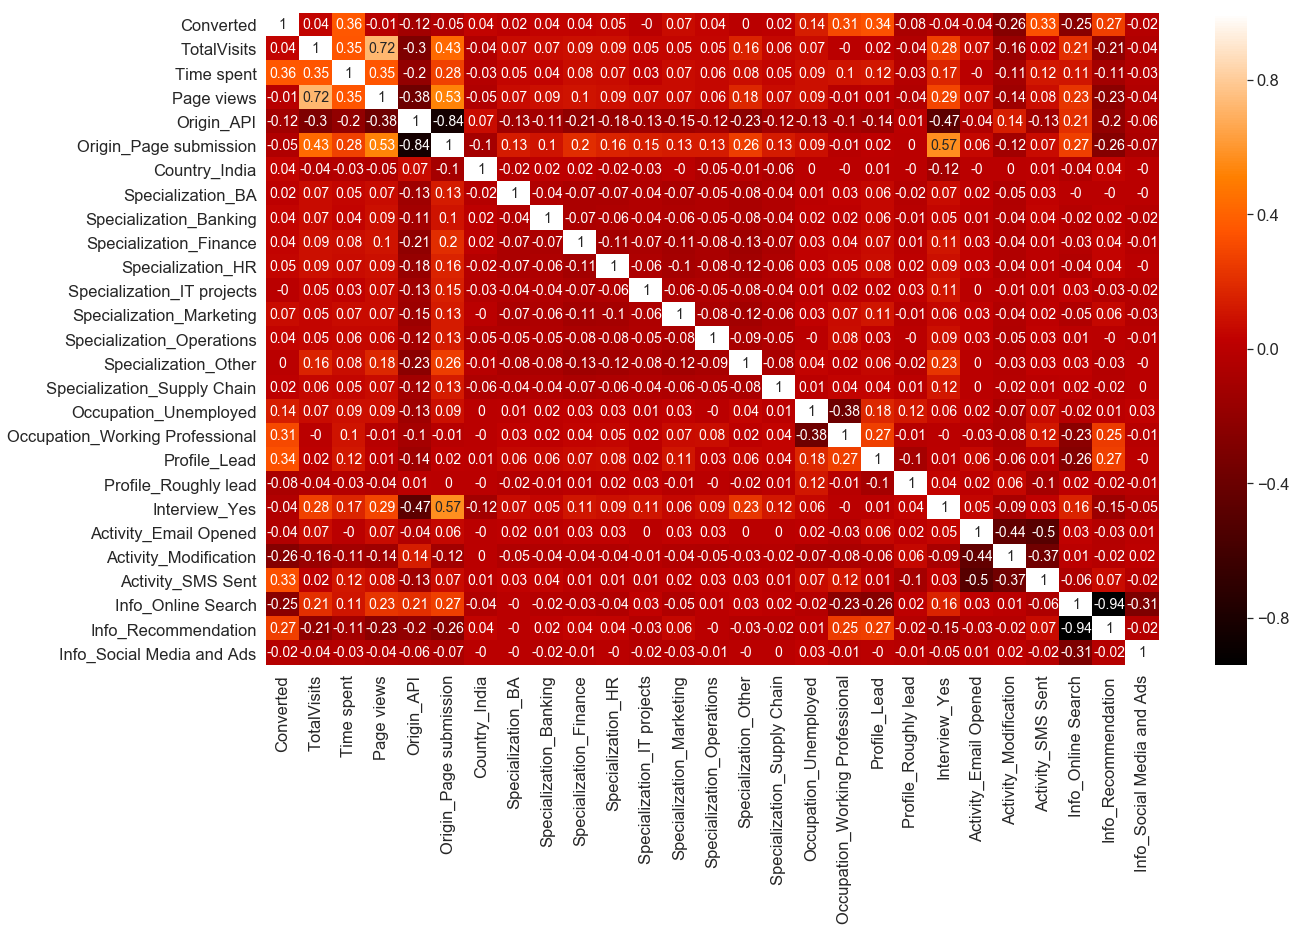

In [94]:
# Correlation matrix

correlation = round(df.corr(),2)
plt.rcParams['font.size'] = 20
sns.set(font_scale=1.5)
plt.figure(figsize = (20,12))        
sns.heatmap(correlation, annot = True, cmap='gist_heat', annot_kws={"size": 14}, 
            xticklabels=list(df.columns.values), yticklabels=list(df.columns.values))
plt.show()

In [95]:
#Correlation with output variable
correlation_target = abs(correlation["Converted"])

#Selecting highly correlated features
relevant_features = correlation_target[correlation_target > 0.5] # correlation value above 0.5 or below -0.5 is stronger
relevant_features

Converted    1.0
Name: Converted, dtype: float64

<div class="alert alert-block alert-info">
<b>Note:</b> You can see that there are no independent variables that are highly correlated with target variable except itself. So we don't have to drop any column after analysing correlation heatmap.
</div>

## Creating model

In [96]:
# Logistic regression model

logmodel = sm.GLM(Y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
print(logmodel.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2503.5
Date:                Mon, 01 Jun 2020   Deviance:                       5007.1
Time:                        22:29:12   Pearson chi2:                 6.84e+03
No. Iterations:                    19   Covariance Type:             nonrobust
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              20.2086   1.25e+04      0.002      0.999   -2.45e+04  

<div class="alert alert-block alert-danger">
<b>Note:</b> Looking at the Coeff. & p-values of each column one can see they're statistically insignificant & there's high scope of some feature elimination.
</div>

## Feature selection using RFE

In [97]:
logreg = LogisticRegression()

In [98]:
rfe = RFE(logreg, 15)             # taking 15 best features at a time
rfe = rfe.fit(X_train, Y_train)

In [99]:
feature_check = pd.DataFrame(X_train.columns, columns=['Columns'])
feature_check['RFE Support'] = rfe.support_
feature_check['Rank'] = rfe.ranking_
feature_check

,Columns,RFE Support,Rank
0,TotalVisits,False,10
1,Time spent,True,1
2,Page views,False,9
3,Origin_API,True,1
4,Origin_Page submission,True,1
5,Country_India,True,1
6,Specialization_BA,False,12
7,Specialization_Banking,True,1
8,Specialization_Finance,False,3
9,Specialization_HR,False,2


<div class="alert alert-block alert-info">
<b>Note:</b> True in RFE Support only tells whether that column is in top 15 or not, shortlisted automatically. And Rank 1 indicate the estimated best ones.
</div>

In [100]:
selected = list(X_train.columns[rfe.support_])
selected

['Time spent',
 'Origin_API',
 'Origin_Page submission',
 'Country_India',
 'Specialization_Banking',
 'Specialization_Marketing',
 'Specialization_Operations',
 'Occupation_Unemployed',
 'Occupation_Working Professional',
 'Profile_Lead',
 'Profile_Roughly lead',
 'Activity_Modification',
 'Activity_SMS Sent',
 'Info_Online Search',
 'Info_Social Media and Ads']

<div class="alert alert-block alert-success">
<b>Note:</b> These columns have been selected by RFE.
</div>

In [101]:
removed = list(X_train.columns[~rfe.support_])
removed

['TotalVisits',
 'Page views',
 'Specialization_BA',
 'Specialization_Finance',
 'Specialization_HR',
 'Specialization_IT projects',
 'Specialization_Other',
 'Specialization_Supply Chain',
 'Interview_Yes',
 'Activity_Email Opened',
 'Info_Recommendation']

<div class="alert alert-block alert-danger">
<b>Note:</b> These columns have been removed by RFE.
</div>

## Assessing the model with StatsModels

In [102]:
X_train_sm = sm.add_constant(X_train[selected])  # passing selected columns
logmodel = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
result = logmodel.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6347
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2539.5
Date:                Mon, 01 Jun 2020   Deviance:                       5079.0
Time:                        22:29:13   Pearson chi2:                 6.77e+03
No. Iterations:                     6   Covariance Type:             nonrobust
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.2071      0.308      0.672      0.501      -0.397  

<div class="alert alert-block alert-danger">
<b>Note:</b> Out of these selected 15 columns, 'Specialization_Banking' (0.199) column has a higher p-value than others. Priority is given to those which has p-value less than 0.05. So we'll manually remove this column.
</div>

In [103]:
# removing column from selected list
selected.remove('Specialization_Banking')

# remodeling
X_train_sm = sm.add_constant(X_train[selected])  # passing selected columns
logmodel = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
result = logmodel.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6348
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2540.3
Date:                Mon, 01 Jun 2020   Deviance:                       5080.6
Time:                        22:29:13   Pearson chi2:                 6.78e+03
No. Iterations:                     6   Covariance Type:             nonrobust
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.2084      0.308      0.677      0.499      -0.395  

<div class="alert alert-block alert-danger">
<b>Note:</b> 'Specialization_Marketing' (0.057) > 0.05 to be removed.
</div>

In [104]:
# removing column from the selected list
selected.remove('Specialization_Marketing')

# remodeling
X_train_sm = sm.add_constant(X_train[selected])  # passing selected columns
logmodel = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
result = logmodel.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6349
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2542.1
Date:                Mon, 01 Jun 2020   Deviance:                       5084.2
Time:                        22:29:13   Pearson chi2:                 6.78e+03
No. Iterations:                     6   Covariance Type:             nonrobust
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.2264      0.308      0.735      0.462      -0.377  

<div class="alert alert-block alert-danger">
<b>Note:</b> 'Specialization_Operations' (0.120) > 0.05 to be removed.
</div>

In [105]:
# removing column from the selected list
selected.remove('Specialization_Operations')

# remodeling
X_train_sm = sm.add_constant(X_train[selected])  # passing selected columns
logmodel = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
result = logmodel.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6350
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2543.3
Date:                Mon, 01 Jun 2020   Deviance:                       5086.6
Time:                        22:29:14   Pearson chi2:                 6.78e+03
No. Iterations:                     6   Covariance Type:             nonrobust
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.2492      0.307      0.810      0.418      -0.353  

<div class="alert alert-block alert-info">
<b>Note:</b> So far so good. The p-values are perfect. But let us also check the VIF values for each.
</div>

## Checking VIF

In [106]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[selected].columns
vif['VIF'] = [variance_inflation_factor(X_train[selected].values, i) for i in range(X_train[selected].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Info_Online Search,55.59
2,Origin_Page submission,25.72
1,Origin_API,19.33
3,Country_India,14.43
4,Occupation_Unemployed,3.62
9,Activity_SMS Sent,1.70
6,Profile_Lead,1.65
5,Occupation_Working Professional,1.54
8,Activity_Modification,1.53
0,Time spent,1.12


<div class="alert alert-block alert-danger">
<b>Note:</b> Priority should be given to those whose VIF value is less than 5. <b>'Info_Online Search' (55.59) > 5.0 to be removed.</b>
</div>

In [107]:
# removing column from selected list
selected.remove('Info_Online Search')

# remodeling
X_train_sm = sm.add_constant(X_train[selected])  # passing selected columns
logmodel = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
result = logmodel.fit()
#print(result.summary())

In [108]:
vif = pd.DataFrame()
vif['Features'] = X_train[selected].columns
vif['VIF'] = [variance_inflation_factor(X_train[selected].values, i) for i in range(X_train[selected].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Country_India,12.48
2,Origin_Page submission,5.72
1,Origin_API,4.70
4,Occupation_Unemployed,3.54
9,Activity_SMS Sent,1.70
6,Profile_Lead,1.62
5,Occupation_Working Professional,1.54
8,Activity_Modification,1.53
0,Time spent,1.12
7,Profile_Roughly lead,1.09


<div class="alert alert-block alert-danger">
<b>Note:</b> 'Country_India' (12.48) > 5.0 to be removed.
</div>

In [109]:
# removing column from selected list
selected.remove('Country_India')

# remodeling
X_train_sm = sm.add_constant(X_train[selected])  # passing selected columns
logmodel = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
result = logmodel.fit()
#print(result.summary())

In [110]:
vif = pd.DataFrame()
vif['Features'] = X_train[selected].columns
vif['VIF'] = [variance_inflation_factor(X_train[selected].values, i) for i in range(X_train[selected].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Occupation_Unemployed,3.14
2,Origin_Page submission,2.38
1,Origin_API,1.85
8,Activity_SMS Sent,1.62
5,Profile_Lead,1.60
7,Activity_Modification,1.48
4,Occupation_Working Professional,1.43
0,Time spent,1.09
6,Profile_Roughly lead,1.09
9,Info_Social Media and Ads,1.02


<div class="alert alert-block alert-success">
<b>Note:</b> Good to go. We are left with top 10 columns.
</div>

## Prediction and Probability

In [111]:
# Predicting using last modified model 'result'

Y_train_pred = result.predict(X_train_sm)

In [112]:
# creating new dataframe to show actual, prediction and probability values

Y_train_pred_final = pd.DataFrame({'Lead':Y_train.values, 'Lead_Probability':Y_train_pred})

In [113]:
# Creating new column 'Predicted' with 1 if Lead_Probability > 0.5 else 0

Y_train_pred_final['Predicted'] = Y_train_pred_final['Lead_Probability'].map(lambda x: 1 if x > 0.5 else 0)
Y_train_pred_final['Lead Score (out of 100)'] = Y_train_pred_final['Lead_Probability'].map(lambda x: round(x,2)*100)
Y_train_pred_final.head()

,Lead,Lead_Probability,Predicted,Lead Score (out of 100)
302,0,0.107362,0,11.0
6087,0,0.022845,0,2.0
1033,0,0.319196,0,32.0
7656,0,0.391861,0,39.0
3241,1,0.660191,1,66.0


## `Confusion matrix`

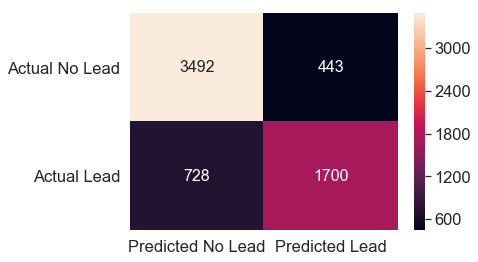

In [114]:
    # Predicted      no_Lead                  Lead
# Actual
# no_Lead       True Negative (TN )     False Positive (FP)
# Lead          False Negative (FN)     True Positive (TP) 

confusion = metrics.confusion_matrix(Y_train_pred_final['Lead'],Y_train_pred_final['Predicted'])


plt.rcParams['font.size'] = 20
sns.set(font_scale=1.5)
sns.heatmap(confusion, annot=True, fmt='g', annot_kws={"size": 16},
            xticklabels=["Predicted No Lead", "Predicted Lead"], 
            yticklabels=["Actual No Lead", "Actual Lead"])
plt.show()

<div class="alert alert-block alert-success">
<b>Note:</b> 
    <li><b>[0,0] = True Negative (TN): </b> Truly 'No Lead' predicted as 'No Lead' were 3492 records.</li>
    <li><b>[0,1] = False Positive (FP): </b> Falsely 'No Lead' predicted as 'Lead' were 443 records.</li>
    <li><b>[1,0] = False Negative (FN): </b> Falsely 'Lead' predicted as 'No Lead' were 728 records.</li>
    <li><b>[1,1] = True Positive (TP): </b> Truly 'Lead' predicted as 'Lead' were 1700 records.</li>
</div>

In [115]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

## `Accuracy`

In [116]:
# Let's check the overall accuracy.
print("Accuracy =", round(metrics.accuracy_score(Y_train_pred_final['Lead'], Y_train_pred_final['Predicted']),2)*100,"%")

Accuracy = 82.0 %


## `Sensitivity`

In [117]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity =", round(TP / float(TP+FN),2)*100,"%")

Sensitivity = 70.0 %


## `Specificity`

In [118]:
# Let us calculate specificity
print("Specificity =", round(TN / float(TN+FP),2)*100,"%")

Specificity = 89.0 %


## `False postive rate`

In [119]:
# Calculate false postive rate - predicting 'No lead' when customer was a 'Lead'
print("False positive rate =", round(FP/ float(TN+FP),2)*100,"%")

False positive rate = 11.0 %


## `Positive predictive value`

In [120]:
# positive predictive value 
print("Positive predictive value =", round(TP / float(TP+FP),2)*100,"%")

Positive predictive value = 79.0 %


## `Negative predictive value`

In [121]:
# Negative predictive value
print("Negative predictive value =", round(TN / float(TN+ FN),2)*100,"%")

Negative predictive value = 83.0 %


## Summary

In [122]:
print("======S-U-M-M-A-R-Y======\n")
print("Accuracy =", round(metrics.accuracy_score(Y_train_pred_final['Lead'], Y_train_pred_final['Predicted']),2)*100,"%")
print("Sensitivity =", round(TP / float(TP+FN),2)*100,"%")
print("Specificity =", round(TN / float(TN+FP),2)*100,"%")
print("False positive rate =", round(FP/ float(TN+FP),2)*100,"%")
print("Positive predictive value =", round(TP / float(TP+FP),2)*100,"%")
print("Negative predictive value =", round(TN / float(TN+ FN),2)*100,"%")

======S-U-M-M-A-R-Y======

Accuracy = 82.0 %
Sensitivity = 70.0 %
Specificity = 89.0 %
False positive rate = 11.0 %
Positive predictive value = 79.0 %
Negative predictive value = 83.0 %


## First ROC curve

In [123]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(8, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [124]:
fpr, tpr, thresholds = metrics.roc_curve( Y_train_pred_final['Lead'], 
                                          Y_train_pred_final['Lead_Probability'], 
                                          drop_intermediate = False )

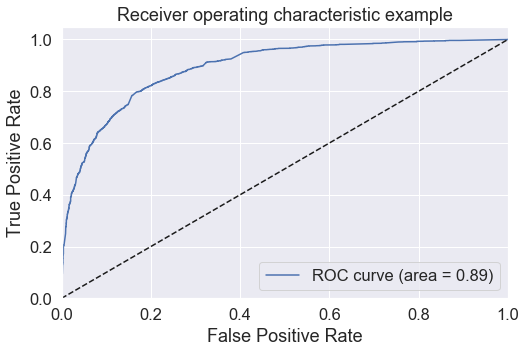

In [125]:
draw_roc(Y_train_pred_final['Lead'], Y_train_pred_final['Lead_Probability'])

<div class="alert alert-block alert-info">
<b>Note:</b> Area under the curve = 89%
</div>

## Optimal CutOff Point
### (Balanced sensitivity and specificity)

In [126]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    Y_train_pred_final[i]= Y_train_pred_final['Lead_Probability'].map(lambda x: 1 if x > i else 0)
Y_train_pred_final.head()

,Lead,Lead_Probability,Predicted,Lead Score (out of 100),0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
302,0,0.107362,0,11.0,1,1,0,0,0,0,0,0,0,0
6087,0,0.022845,0,2.0,1,0,0,0,0,0,0,0,0,0
1033,0,0.319196,0,32.0,1,1,1,1,0,0,0,0,0,0
7656,0,0.391861,0,39.0,1,1,1,1,0,0,0,0,0,0
3241,1,0.660191,1,66.0,1,1,1,1,1,1,1,0,0,0


In [127]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(Y_train_pred_final['Lead'], Y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

cutoff_df

,Probability,Accuracy,Sensitivity,Specificity
0.0,0.0,0.381581,1.000000,0.000000
0.1,0.1,0.647493,0.974876,0.445489
0.2,0.2,0.762376,0.913509,0.669123
0.3,0.3,0.793336,0.851730,0.757306
0.4,0.4,0.818639,0.796952,0.832020
0.5,0.5,0.815967,0.700165,0.887421
0.6,0.6,0.812667,0.637974,0.920457
0.7,0.7,0.792865,0.543245,0.946887
0.8,0.8,0.762533,0.421746,0.972808
0.9,0.9,0.728587,0.307661,0.988310


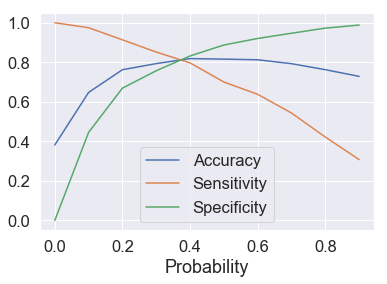

In [128]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> Cut-Off = 0.38
</div>

In [129]:
# From the curve above, 0.38 is the optimum point to take it as a cutoff probability.

Y_train_pred_final['final_predicted'] = Y_train_pred_final['Lead_Probability'].map( lambda x: 1 if x > 0.38 else 0)
Y_train_pred_final['Lead Score (out of 100)'] = Y_train_pred_final['Lead_Probability'].map(lambda x: round(x,2)*100)
Y_train_pred_final.head()

,Lead,Lead_Probability,Predicted,Lead Score (out of 100),0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
302,0,0.107362,0,11.0,1,1,0,0,0,0,0,0,0,0,0
6087,0,0.022845,0,2.0,1,0,0,0,0,0,0,0,0,0,0
1033,0,0.319196,0,32.0,1,1,1,1,0,0,0,0,0,0,0
7656,0,0.391861,0,39.0,1,1,1,1,0,0,0,0,0,0,1
3241,1,0.660191,1,66.0,1,1,1,1,1,1,1,0,0,0,1


## `New Confusion matrix`

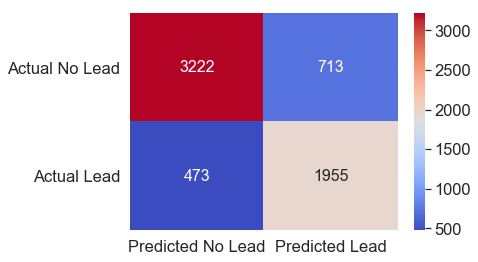

In [130]:
    # Predicted      no_Lead                  Lead
# Actual
# no_Lead       True Negative (TN )     False Positive (FP)
# Lead          False Negative (FN)     True Positive (TP) 

new_confusion = metrics.confusion_matrix(Y_train_pred_final['Lead'],Y_train_pred_final['final_predicted'])


plt.rcParams['font.size'] = 20
sns.set(font_scale=1.5)
sns.heatmap(new_confusion, annot=True, fmt='g', annot_kws={"size": 16}, cmap='coolwarm',
            xticklabels=["Predicted No Lead", "Predicted Lead"], 
            yticklabels=["Actual No Lead", "Actual Lead"])
plt.show()

<div class="alert alert-block alert-success">
<b>New Confusion Matrix:</b> 
    <li><b>[0,0] = True Negative (TN): </b> Truly 'No Lead' predicted as 'No Lead' were 3222 records.</li>
    <li><b>[0,1] = False Positive (FP): </b> Falsely 'No Lead' predicted as 'Lead' were 713 records.</li>
    <li><b>[1,0] = False Negative (FN): </b> Falsely 'Lead' predicted as 'No Lead' were 473 records.</li>
    <li><b>[1,1] = True Positive (TP): </b> Truly 'Lead' predicted as 'Lead' were 1955 records.</li>
</div>

<div class="alert alert-block alert-danger">
<b>Old Confusion Matrix:</b> 
    <li><b>[0,0] = True Negative (TN): </b> Truly 'No Lead' predicted as 'No Lead' were 3492 records.</li>
    <li><b>[0,1] = False Positive (FP): </b> Falsely 'No Lead' predicted as 'Lead' were 443 records.</li>
    <li><b>[1,0] = False Negative (FN): </b> Falsely 'Lead' predicted as 'No Lead' were 728 records.</li>
    <li><b>[1,1] = True Positive (TP): </b> Truly 'Lead' predicted as 'Lead' were 1700 records.</li>
</div>

In [131]:
New_TP = new_confusion[1,1] # true positive 
New_TN = new_confusion[0,0] # true negatives
New_FP = new_confusion[0,1] # false positives
New_FN = new_confusion[1,0] # false negatives

## `Accuracy`

In [132]:
# Let's check the overall accuracy.
print("Old Accuracy =", round(metrics.accuracy_score(Y_train_pred_final['Lead'], Y_train_pred_final['Predicted']),2)*100,"%")

Old Accuracy = 82.0 %


In [133]:
# Let's check the overall accuracy.
print("New Accuracy =", round(metrics.accuracy_score(Y_train_pred_final['Lead'], Y_train_pred_final['final_predicted']),2)*100,"%")

New Accuracy = 81.0 %


## `Sensitivity`

In [134]:
# Let's see the sensitivity of our logistic regression model
print("Old Sensitivity =", round(TP / float(TP+FN),2)*100,"%")

Old Sensitivity = 70.0 %


In [135]:
# Let's see the sensitivity of our logistic regression model
print("New Sensitivity =", round(New_TP / float(New_TP+New_FN),2)*100,"%")

New Sensitivity = 81.0 %


## `Specificity`

In [136]:
# Let us calculate specificity
print("Old Specificity =", round(TN / float(TN+FP),2)*100,"%")

Old Specificity = 89.0 %


In [137]:
# Let us calculate specificity
print("New Specificity =", round(New_TN / float(New_TN+New_FP),2)*100,"%")

New Specificity = 82.0 %


## `False postive rate`

In [138]:
# Calculate false postive rate - predicting 'No lead' when customer was a 'Lead'
print("Old False positive rate =", round(FP/ float(TN+FP),2)*100,"%")

Old False positive rate = 11.0 %


In [139]:
# Calculate false postive rate - predicting 'No lead' when customer was a 'Lead'
print("New False positive rate =", round(New_FP/ float(New_TN+New_FP),2)*100,"%")

New False positive rate = 18.0 %


## `Positive predictive value`

In [140]:
# positive predictive value 
print("Old Positive predictive value =", round(TP / float(TP+FP),2)*100,"%")

Old Positive predictive value = 79.0 %


In [141]:
# positive predictive value 
print("New Positive predictive value =", round(New_TP / float(New_TP+New_FP),2)*100,"%")

New Positive predictive value = 73.0 %


## `Negative predictive value`

In [142]:
# Negative predictive value
print("Old Negative predictive value =", round(TN / float(TN+ FN),2)*100,"%")

Old Negative predictive value = 83.0 %


In [143]:
# Negative predictive value
print("New Negative predictive value =", round(New_TN / float(New_TN+ New_FN),2)*100,"%")

New Negative predictive value = 87.0 %


## Summary

In [144]:
print("======S-U-M-M-A-R-Y======\n")

print("Old Accuracy =", round(metrics.accuracy_score(Y_train_pred_final['Lead'], Y_train_pred_final['Predicted']),2)*100,"%")
print("New Accuracy =", round(metrics.accuracy_score(Y_train_pred_final['Lead'], Y_train_pred_final['final_predicted']),2)*100,"%\n")

print("Old Sensitivity =", round(TP / float(TP+FN),2)*100,"%")
print("New Sensitivity =", round(New_TP / float(New_TP+New_FN),2)*100,"%\n")

print("Old Specificity =", round(TN / float(TN+FP),2)*100,"%")
print("New Specificity =", round(New_TN / float(New_TN+New_FP),2)*100,"%\n")

print("Old False positive rate =", round(FP/ float(TN+FP),2)*100,"%")
print("New False positive rate =", round(New_FP/ float(New_TN+New_FP),2)*100,"%\n")

print("Old Positive predictive value =", round(TP / float(TP+FP),2)*100,"%")
print("New Positive predictive value =", round(New_TP / float(New_TP+New_FP),2)*100,"%\n")

print("Old Negative predictive value =", round(TN / float(TN+ FN),2)*100,"%")
print("New Negative predictive value =", round(New_TN / float(New_TN+ New_FN),2)*100,"%")

======S-U-M-M-A-R-Y======

Old Accuracy = 82.0 %
New Accuracy = 81.0 %

Old Sensitivity = 70.0 %
New Sensitivity = 81.0 %

Old Specificity = 89.0 %
New Specificity = 82.0 %

Old False positive rate = 11.0 %
New False positive rate = 18.0 %

Old Positive predictive value = 79.0 %
New Positive predictive value = 73.0 %

Old Negative predictive value = 83.0 %
New Negative predictive value = 87.0 %


## Second ROC curve 
### (with optimal cutoff point = 0.38, train set)

In [145]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(8, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [146]:
fpr, tpr, thresholds = metrics.roc_curve( Y_train_pred_final['Lead'], 
                                          Y_train_pred_final['final_predicted'], 
                                          drop_intermediate = False )

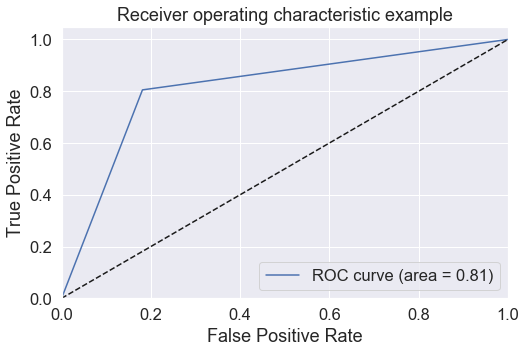

In [147]:
draw_roc(Y_train_pred_final['Lead'], Y_train_pred_final['final_predicted'])

<div class="alert alert-block alert-info">
<b>Note:</b> Area under the curve = 81%
</div>

## Precision and Recall

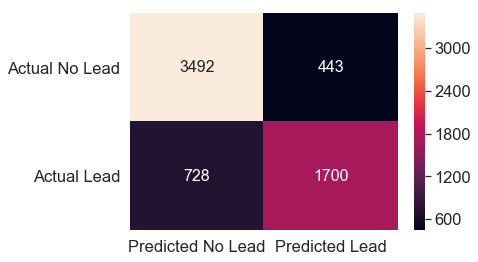

In [148]:
#Let us look at the old confusion matrix again
confusion = metrics.confusion_matrix(Y_train_pred_final['Lead'],Y_train_pred_final['Predicted'])


plt.rcParams['font.size'] = 20
sns.set(font_scale=1.5)
sns.heatmap(confusion, annot=True, fmt='g', annot_kws={"size": 16},
            xticklabels=["Predicted No Lead", "Predicted Lead"], 
            yticklabels=["Actual No Lead", "Actual Lead"])
plt.show()

## `Precision`

In [149]:
# calculating precision TP / TP + FP from confusion matrix
print("Precision =",round(confusion[1,1]/(confusion[0,1]+confusion[1,1]),2)*100,"%")

Precision = 79.0 %


In [150]:
# precision by sklearn.metrics
print("Precision =",round(precision_score(Y_train_pred_final['Lead'], Y_train_pred_final['Predicted']),2)*100,"%")

Precision = 79.0 %


## `Recall`

In [151]:
# calculating recall TP / TP + FN from confusion matrix
print("Recall =",round(confusion[1,1]/(confusion[1,0]+confusion[1,1]),2)*100,"%")

Recall = 70.0 %


In [152]:
# recall by sklearn.metrics
print("Recall =",round(recall_score(Y_train_pred_final['Lead'], Y_train_pred_final['Predicted']),2)*100,"%")

Recall = 70.0 %


In [153]:
p, r, thresholds = precision_recall_curve(Y_train_pred_final['Lead'], Y_train_pred_final['Lead_Probability'])

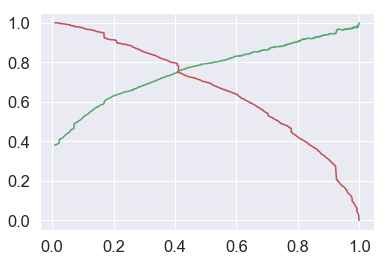

In [154]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> Cut-Off = 0.41
</div>

## Making predictions on test set

In [155]:
# rescaling test dataset but not fitting
X_test[['TotalVisits','Time spent','Page views']] = scaler.transform(X_test[['TotalVisits','Time spent','Page views']])

In [156]:
# test dataset
X_test = X_test[selected]
X_test.head()

,Time spent,Origin_API,Origin_Page submission,Occupation_Unemployed,Occupation_Working Professional,Profile_Lead,Profile_Roughly lead,Activity_Modification,Activity_SMS Sent,Info_Social Media and Ads
6906,1.919395,0,1,1,0,1,0,0,1,0
1873,-0.546142,0,1,1,0,0,0,0,1,0
771,-0.797465,1,0,1,0,0,0,0,0,0
4495,-0.623190,0,1,1,0,0,0,0,0,0
9061,2.392690,0,1,0,0,0,0,0,0,0


In [157]:
# adding constant to model
X_test_sm = sm.add_constant(X_test)

In [158]:
# predictions on test set
Y_test_pred = result.predict(X_test_sm)

In [159]:
# Converting y_test_pred to a dataframe which is an array
Y_predicted = pd.DataFrame(Y_test_pred, columns=['Test_Lead_Probability'])

# Converting y_test to dataframe
Y_test_df = pd.DataFrame(Y_test)

In [160]:
# Appending y_test_df and y_predicted
Y_pred_final = pd.concat([Y_test_df, Y_predicted],axis=1)

Y_pred_final.head()

,Converted,Test_Lead_Probability
6906,1,0.946386
1873,0,0.324205
771,0,0.181581
4495,0,0.114682
9061,1,0.477121


In [161]:
# adding test predicted column based on cutoff
Y_pred_final['final_test_predicted'] = Y_pred_final['Test_Lead_Probability'].map(lambda x: 1 if x > 0.41 else 0)
Y_pred_final['Lead Score (out of 100)'] = Y_pred_final['Test_Lead_Probability'].map(lambda x: round(x,2)*100)
Y_pred_final.head()

,Converted,Test_Lead_Probability,final_test_predicted,Lead Score (out of 100)
6906,1,0.946386,1,95.0
1873,0,0.324205,0,32.0
771,0,0.181581,0,18.0
4495,0,0.114682,0,11.0
9061,1,0.477121,1,48.0


## `Test Confusion matrix`

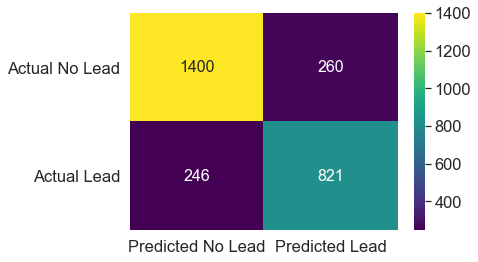

In [162]:
# confusion matrix for test set
test_confusion = metrics.confusion_matrix(Y_pred_final['Converted'],Y_pred_final['final_test_predicted'])


plt.rcParams['font.size'] = 20
sns.set(font_scale=1.5)
sns.heatmap(test_confusion, annot=True, fmt='g', annot_kws={"size": 16}, cmap='viridis',
            xticklabels=["Predicted No Lead", "Predicted Lead"], 
            yticklabels=["Actual No Lead", "Actual Lead"])
plt.show()

<div class="alert alert-block alert-success">
<b>Note:</b> 
    <li><b>[0,0] = True Negative (TN): </b> Truly 'No Lead' predicted as 'No Lead' were 1400 records.</li>
    <li><b>[0,1] = False Positive (FP): </b> Falsely 'No Lead' predicted as 'Lead' were 260 records.</li>
    <li><b>[1,0] = False Negative (FN): </b> Falsely 'Lead' predicted as 'No Lead' were 246 records.</li>
    <li><b>[1,1] = True Positive (TP): </b> Truly 'Lead' predicted as 'Lead' were 821 records.</li>
</div>

In [163]:
test_TP = test_confusion[1,1] # true positive 
test_TN = test_confusion[0,0] # true negatives
test_FP = test_confusion[0,1] # false positives
test_FN = test_confusion[1,0] # false negatives

## `Accuracy`

In [164]:
# Let's check the overall accuracy.
print("Test Accuracy =", round(metrics.accuracy_score(Y_pred_final['Converted'],Y_pred_final['final_test_predicted']),2)*100,"%")

Test Accuracy = 81.0 %


## `Sensitivity`

In [165]:
# Let's see the sensitivity of our logistic regression model
print("Test Sensitivity =", round(test_TP / float(test_TP+test_FN),2)*100,"%")

Test Sensitivity = 77.0 %


## `Specificity`

In [166]:
# Let us calculate specificity
print("Test Specificity =", round(test_TN / float(test_TN+test_FP),2)*100,"%")

Test Specificity = 84.0 %


## `False postive rate`

In [167]:
# Calculate false postive rate - predicting 'No lead' when customer was a 'Lead'
print("Test False positive rate =", round(test_FP/ float(test_TN+test_FP),2)*100,"%")

Test False positive rate = 16.0 %


## `Positive predictive value`

In [168]:
# positive predictive value 
print("Test Positive predictive value =", round(test_TP / float(test_TP+test_FP),2)*100,"%")

Test Positive predictive value = 76.0 %


## `Negative predictive value`

In [169]:
# Negative predictive value
print("Test Negative predictive value =", round(test_TN / float(test_TN+ test_FN),2)*100,"%")

Test Negative predictive value = 85.0 %


## Summary

In [170]:
print("======T-E-S-T__S-U-M-M-A-R-Y======\n")
print("Accuracy =", round(metrics.accuracy_score(Y_pred_final['Converted'],Y_pred_final['final_test_predicted']),2)*100,"%")
print("Sensitivity =", round(test_TP / float(test_TP+test_FN),2)*100,"%")
print("Specificity =", round(test_TN / float(test_TN+test_FP),2)*100,"%")
print("False positive rate =", round(test_FP/ float(test_TN+test_FP),2)*100,"%")
print("Positive predictive value =", round(test_TP / float(test_TP+test_FP),2)*100,"%")
print("Negative predictive value =", round(test_TN / float(test_TN+ test_FN),2)*100,"%")

======T-E-S-T__S-U-M-M-A-R-Y======

Accuracy = 81.0 %
Sensitivity = 77.0 %
Specificity = 84.0 %
False positive rate = 16.0 %
Positive predictive value = 76.0 %
Negative predictive value = 85.0 %


## Third ROC curve 
### (same model with optimal cutoff point = 0.38, test set)

In [171]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(8, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [172]:
fpr, tpr, thresholds = metrics.roc_curve( Y_pred_final['Converted'],Y_pred_final['final_test_predicted'], 
                                          drop_intermediate = False )

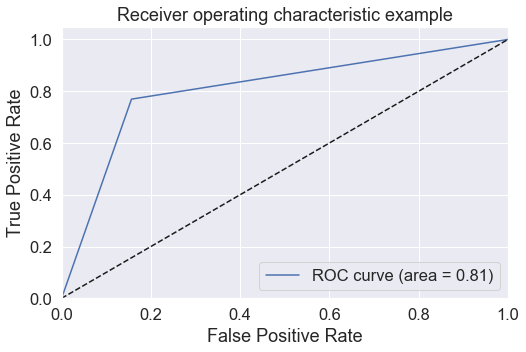

In [173]:
draw_roc(Y_pred_final['Converted'],Y_pred_final['final_test_predicted'])

<div class="alert alert-block alert-info">
<b>Note:</b> Area under the curve = 81%
</div>